# Tyler Cummings

## Research question/interests

**Do players from different regions use different characters compared to other regions, or do all regions use the same characters?** I will also be comparing the regions and character usage with rank and character usage to see if the rank of each player has an impact on the character they use. An additional column I might need would be win-rates to find if the character they use has an impact on their win percentage. The reason why I am interested in this is because I want to find out if different regions have different strategies when it comes to the characters they play.

In [2]:
# milestone 2
import pandas as pd

df = pd.read_csv('../data/raw/val_stats.csv', low_memory = False)

df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


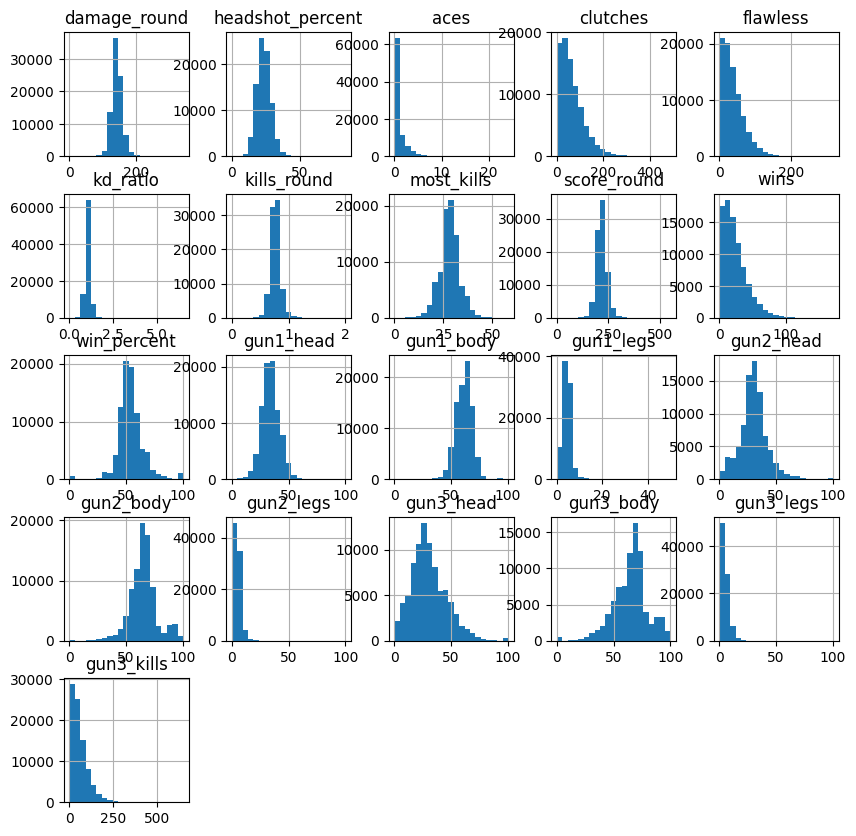

In [3]:
# milestone 3
hist = df.hist(bins=21,figsize =(10,10))

## Analysis of Graph Above
- Wins are heavily impacted by the amount of clutches and flawlesses a player has as seen in distribution
- Damage per round is related greatly to damage a round as seen in the distribution. You can assume this to be correct since headshot do more damage in the game compared to non headshots meaning that the player will do more total damage a round
- Gun 1 gets the most headshots kills which makes sense since looking at the data shows that it is commonly the vandal which is an assault rifle that is a 1 shot headshot
- Gun 2 and 3 seem to have more bodyshots as those are most likely to be smgs and pistols as they are used on either save rounds. Also, since each player always has a pistol and is used when they are out of ammo they are most likely to be gun 2 and to be getting bodyshots with those guns as they'd be in situations where they need to do a small amount of damage in a small amount of time



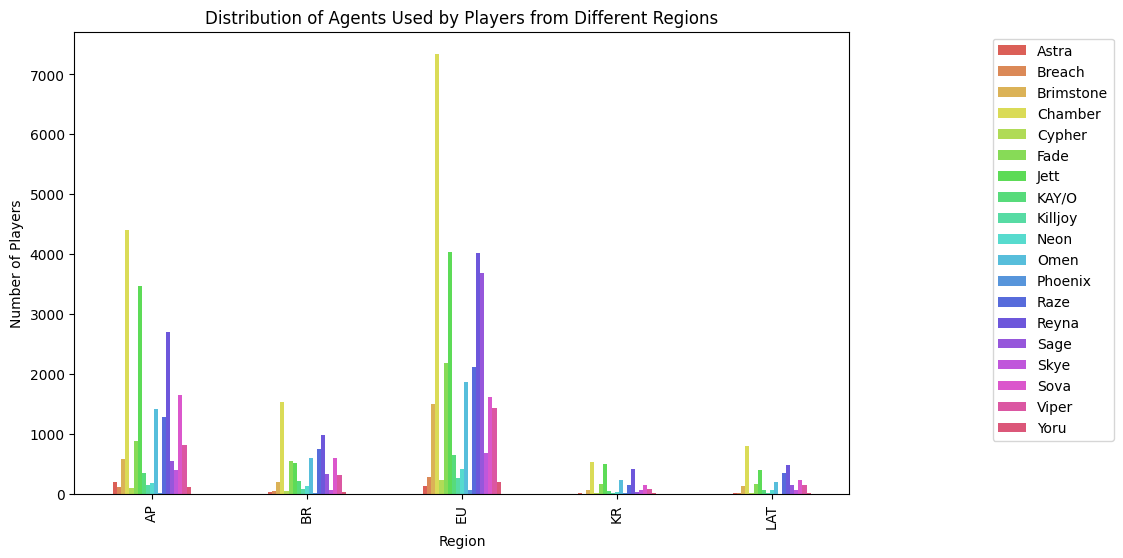

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by region and agent_1, and count the number of occurrences
grouped_df = df.groupby(['region', 'agent_1']).size().reset_index(name='counts')

# Define a custom color palette with 19 colors
agent_colors = sns.color_palette('hls', n_colors=19)

# Create a dictionary to map each agent to a unique color from the color palette
agent_color_map = {agent: color for agent, color in zip(grouped_df['agent_1'].unique(), agent_colors)}

# Create a bar chart using the grouped data and the custom color map
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df.pivot(index='region', columns='agent_1', values='counts').plot.bar(ax=ax, color=grouped_df['agent_1'].map(agent_color_map))
ax.set_xlabel('Region')
ax.set_ylabel('Number of Players')
ax.set_title('Distribution of Agents Used by Players from Different Regions')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
plt.show()

# Graph to answer this question Do players from different regions use different characters compared to other regions, or do all regions use the same characters?

## Analysis of Graph Above
- Chamber seems to be the most commonly played agent for each reagion
- EU has the most amount of players
- Viper seems to be the second most popular agent
- the least popular agent seems to be Phoenix and Cypher
- Region BR is the only one that has more player playing Fade than Jett




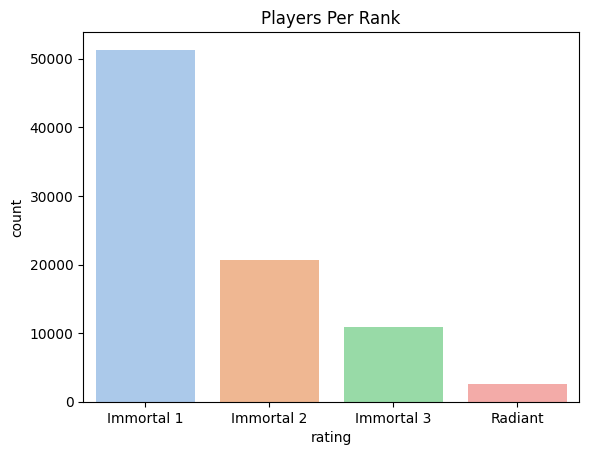

In [8]:
#this countplot shows the lack of data for lower ratings
value_counts = df['rating'].value_counts()

# I Decided to remove the ratings that have less than 10% players of the 35,000 Immortal 1
# Keep rows where the city column is not in to_remove
remove = value_counts[value_counts <= 1750].index
df = df[~df.rating.isin(remove)]

plt.title("Players Per Rank")

sns.countplot(x='rating', data=df, palette='pastel', order=df['rating'].value_counts().index)
plt.show()

# got this from karam to help with deviding the data by rank

## Analysis of Graph Above
- I used this to get rid of the other rankings for the next graph as the amount of players is negligible (Not enough data for those ranks)
- Also you can see that Radiant is much less common then Immortal, this makes sense since radient is only the top 500 players where Immortal can has no limit
- As you get lower in ranks there are more players as seen in immortal 3 having around 1000 players and immortal 1 has 50000+

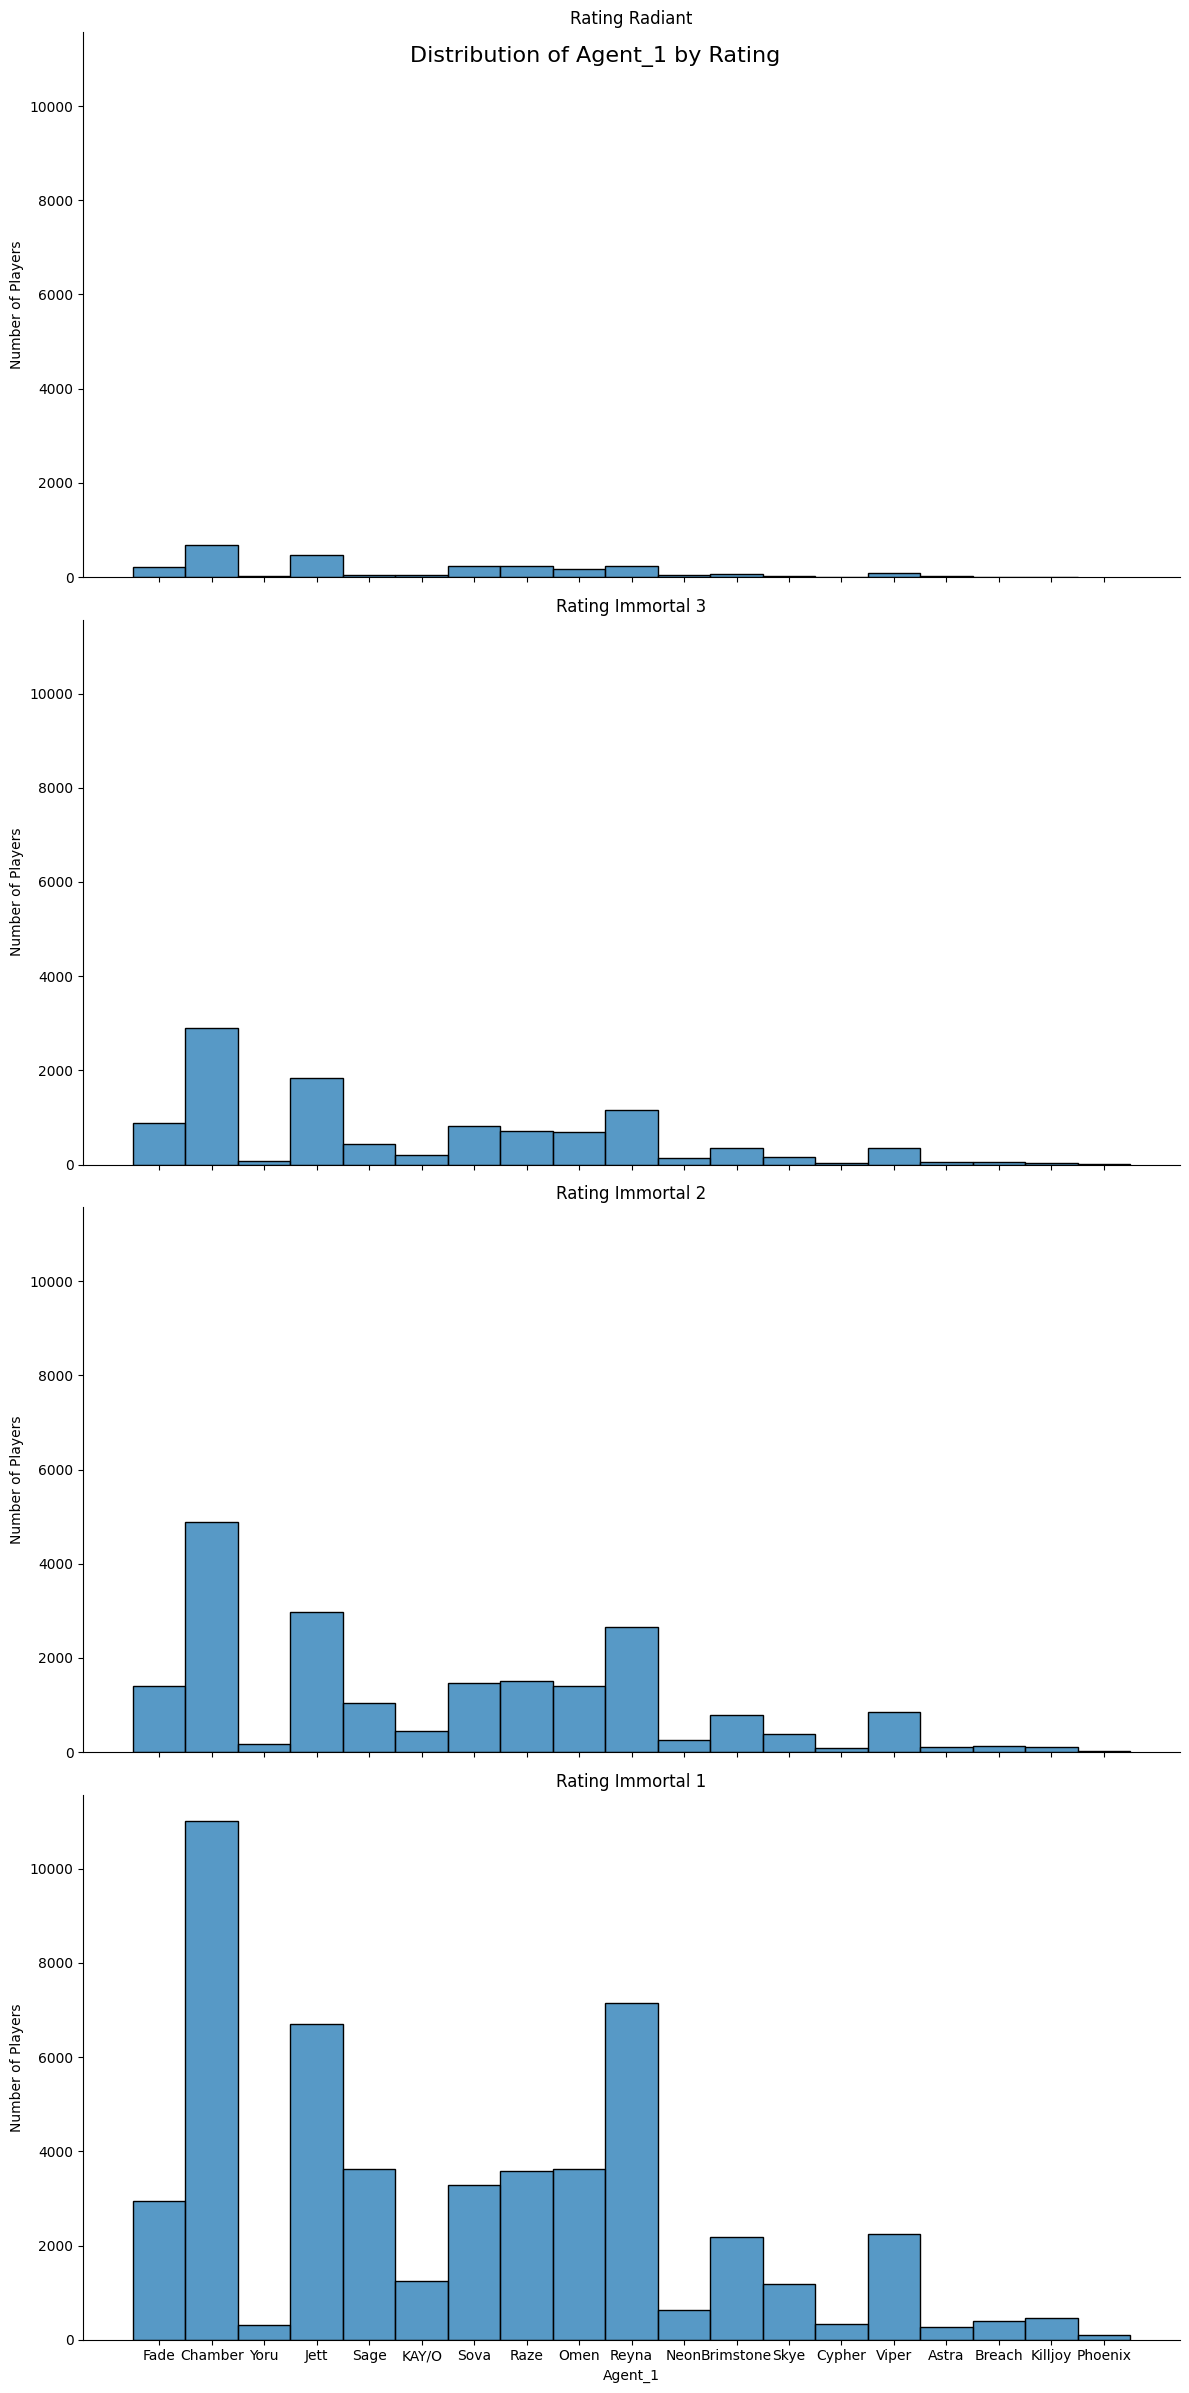

In [6]:
# Drop rows with missing values in the 'agent_1' column
df = df.dropna(subset=['agent_1'])

# Create a FacetGrid to plot a histogram for each rating
g = sns.FacetGrid(data=df, col='rating', col_wrap=1, height=6, aspect=2)

# Map a histogram of Agent_1 for each Rating
g.map(sns.histplot, 'agent_1', bins=20)

# Set the title for each subplot
for ax, title in zip(g.axes.flat, df['rating'].unique()):
    ax.set_ylabel('Number of Players')
    ax.set_title(f"Rating {title}")
"Rating {title}"'Agent_1'
# Set the x-axis label
g.set(xlabel='Agent_1')

# Add a main title for the plot
g.fig.suptitle('Distribution of Agent_1 by Rating', fontsize=16)

# Show the plot
plt.show()

## Analysis of Graph Above
- Chamber is the most common agent by rank
- Yoru, Cypher and Phoenix are all the least picked
- It seems that each rank has very similar meta's for agents picked (not much differentiation)

## Task 2
Revised research question: How does character usage differ across regions in Valorant, and is there a relationship between character usage and player rank or win-rate?

Revised analysis plan:

- Clean and process the data to ensure consistency and accuracy.
- Add a win-rate column to the data to analyze the relationship between character usage and win-rate.
- Aggregate the data by region, rank, and character to compare usage patterns.
- Use visualizations such as bar plots and heatmaps to represent the data and identify patterns.


In [6]:
df.to_csv("../data/processed/processed_T.csv", index=False)

# Milestone 4

### Task 1

In [30]:
# import libraries
import pandas as pd
import numpy as np

In [31]:
# 1 Load Data
df = pd.read_csv('../data/raw/val_stats.csv', low_memory = False)
df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


In [32]:
# 2 Clean Data
df.dropna(inplace=True)
df = df.drop(columns=['name', 'tag'])
df.reset_index(inplace=True, drop=True)
df

,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,EU,Radiant,162.5,954,27.6,4,103,64,191,"1,272",...,Phantom,32,64,4,241,Ghost,46,52,1,135
1,EU,Radiant,140.1,736,22.3,1,98,66,143,"1,154",...,Vandal,31,64,5,354,Spectre,25,72,4,105
2,EU,Radiant,153.1,"1,337",21.9,6,237,98,559,"2,457",...,Operator,7,92,1,462,Phantom,30,64,5,363
3,EU,Radiant,144.0,"1,083",34.7,4,118,71,145,"1,395",...,Sheriff,62,36,2,102,Ghost,51,46,4,95
4,EU,Radiant,140.1,"1,222",27.7,2,161,86,247,"1,861",...,Operator,9,90,2,241,Spectre,32,65,3,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60742,LAT,Radiant,138.2,342,21.4,0,58,54,56,603,...,Vandal,28,69,2,175,Classic,39,59,2,71
60743,LAT,Radiant,182.9,650,30.1,4,77,42,106,885,...,Vandal,40,57,3,212,Spectre,33,63,5,139
60744,LAT,Radiant,158.8,613,30.2,0,70,54,185,919,...,Phantom,40,56,4,159,Operator,10,89,1,87
60745,LAT,Immortal 3,155.9,132,22.2,0,23,18,19,204,...,Phantom,39,57,3,37,Spectre,27,69,4,17


In [33]:
# 3 Process Data
pd.options.mode.chained_assignment = None 
# Compute frequency count of unique values in 'rating' column
value_counts = df['rating'].value_counts()

# Remove rows with rating count less than or equal to 1750
remove = value_counts[value_counts <= 1750].index
df = df.loc[~df['rating'].isin(remove)]

# Compute total number of games played by a player and round to nearest integer
df['total_games'] = (df['wins'] / (df['win_percent'] / 100)).round()

# Print the modified DataFrame
df



,region,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,...,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,total_games
0,EU,Radiant,162.5,954,27.6,4,103,64,191,"1,272",...,32,64,4,241,Ghost,46,52,1,135,69.0
1,EU,Radiant,140.1,736,22.3,1,98,66,143,"1,154",...,31,64,5,354,Spectre,25,72,4,105,73.0
2,EU,Radiant,153.1,"1,337",21.9,6,237,98,559,"2,457",...,7,92,1,462,Phantom,30,64,5,363,137.0
3,EU,Radiant,144.0,"1,083",34.7,4,118,71,145,"1,395",...,62,36,2,102,Ghost,51,46,4,95,85.0
4,EU,Radiant,140.1,"1,222",27.7,2,161,86,247,"1,861",...,9,90,2,241,Spectre,32,65,3,110,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60742,LAT,Radiant,138.2,342,21.4,0,58,54,56,603,...,28,69,2,175,Classic,39,59,2,71,42.0
60743,LAT,Radiant,182.9,650,30.1,4,77,42,106,885,...,40,57,3,212,Spectre,33,63,5,139,40.0
60744,LAT,Radiant,158.8,613,30.2,0,70,54,185,919,...,40,56,4,159,Operator,10,89,1,87,50.0
60745,LAT,Immortal 3,155.9,132,22.2,0,23,18,19,204,...,39,57,3,37,Spectre,27,69,4,17,12.0


In [24]:
# 4 Wrangle Data
df = df.rename(columns={
    'region' : 'Region',
    'rating': 'Rank',
    'damage_round': 'Damage/Round',
    'headshots': 'Headshots',
    'headshot_percent': 'Headshot %',
    'aces': 'Aces',
    'clutches': 'Clutches',
    'flawless': 'Flawless',
    'first_bloods': 'First Bloods',
    'kills': 'Kills',
    'deaths': 'Deaths',
    'assists': 'Assists',
    'kd_ratio': 'K/D',
    'kills_round': 'Kills/Round',
    'most_kills': 'Most Kills',
    'score_round': 'Score/Round',
    'wins': 'Wins',
    'win_percent': 'Win %',
    'agent_1': 'Most Used Agent',
    'agent_2': '2nd Most Used Agent',
    'agent_3': '3rd Most Used Agent',
    'gun1_name': 'Most Used Gun',
    'gun1_head': 'Headshots with Most Used Gun',
    'gun1_body': 'Bodyshots with Most Used Gun',
    'gun1_legs': 'Legshots with Most Usedin Gun',
    'gun1_kills': 'Kills with Most Used Gun',
    'gun2_name': '2nd Most Used Gun',
    'gun2_head': 'Headshots with 2nd Most Used Gun',
    'gun2_body': 'Bodyshots with 2nd Most Used Gun',
    'gun2_legs': 'Legshots with 2nd Most Used Gun',
    'gun2_kills': 'Kills with 2nd Most Used Gun',
    'gun3_name': '3rd Most Used Gun',
    'gun3_head': 'Headshots with 3rd Most Used Gun',
    'gun3_body': 'Bodyshots with 3rd Most Used Gun',
    'gun3_legs': 'Legshots with 3rd Most Used Gun',
    'gun3_kills': 'Kills with 3rd Most Used Gun',
    'total_games': 'Total Games Played',
})
df

,Region,Rank,Damage/Round,Headshots,Headshot %,Aces,Clutches,Flawless,First Bloods,Kills,...,Headshots with 2nd Most Used Gun,Bodyshots with 2nd Most Used Gun,Legshots with 2nd Most Used Gun,Kills with 2nd Most Used Gun,3rd Most Used Gun,Headshots with 3rd Most Used Gun,Bodyshots with 3rd Most Used Gun,Legshots with 3rd Most Used Gun,Kills with 3rd Most Used Gun,Total Games Played
0,EU,Radiant,162.5,954,27.6,4,103,64,191,"1,272",...,32,64,4,241,Ghost,46,52,1,135,69.0
1,EU,Radiant,140.1,736,22.3,1,98,66,143,"1,154",...,31,64,5,354,Spectre,25,72,4,105,73.0
2,EU,Radiant,153.1,"1,337",21.9,6,237,98,559,"2,457",...,7,92,1,462,Phantom,30,64,5,363,137.0
3,EU,Radiant,144.0,"1,083",34.7,4,118,71,145,"1,395",...,62,36,2,102,Ghost,51,46,4,95,85.0
4,EU,Radiant,140.1,"1,222",27.7,2,161,86,247,"1,861",...,9,90,2,241,Spectre,32,65,3,110,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60742,LAT,Radiant,138.2,342,21.4,0,58,54,56,603,...,28,69,2,175,Classic,39,59,2,71,42.0
60743,LAT,Radiant,182.9,650,30.1,4,77,42,106,885,...,40,57,3,212,Spectre,33,63,5,139,40.0
60744,LAT,Radiant,158.8,613,30.2,0,70,54,185,919,...,40,56,4,159,Operator,10,89,1,87,50.0
60745,LAT,Immortal 3,155.9,132,22.2,0,23,18,19,204,...,39,57,3,37,Spectre,27,69,4,17,12.0


### Task 2

In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/raw/val_stats.csv', low_memory=False)

df_cleaned = (
    df.dropna()
      .drop(columns=['name', 'tag'])
      .reset_index(drop=True)
      .pipe(lambda x: x[~x['rating'].isin(x['rating'].value_counts()[x['rating'].value_counts() <= 1750].index)])
      .assign(total_games=lambda x: (x['wins'] / (x['win_percent']/100)).round())
      .rename(columns={
            'region': 'Region',
            'rating': 'Rank',
            'damage_round': 'Damage/Round',
            'headshots': 'Headshots',
            'headshot_percent': 'Headshot %',
            'aces': 'Aces',
            'clutches': 'Clutches',
            'flawless': 'Flawless',
            'first_bloods': 'First Bloods',
            'kills': 'Kills',
            'deaths': 'Deaths',
            'assists': 'Assists',
            'kd_ratio': 'K/D',
            'kills_round': 'Kills/Round',
            'most_kills': 'Most Kills',
            'score_round': 'Score/Round',
            'wins': 'Wins',
            'win_percent': 'Win %',
            'agent_1': 'Most Used Agent',
            'agent_2': '2nd Most Used Agent',
            'agent_3': '3rd Most Used Agent',
            'gun1_name': 'Most Used Gun',
            'gun1_head': 'Headshots with Most Used Gun',
            'gun1_body': 'Bodyshots with Most Used Gun',
            'gun1_legs': 'Legshots with Most Usedin Gun',
            'gun1_kills': 'Kills with Most Used Gun',
            'gun2_name': '2nd Most Used Gun',
            'gun2_head': 'Headshots with 2nd Most Used Gun',
            'gun2_body': 'Bodyshots with 2nd Most Used Gun',
            'gun2_legs': 'Legshots with 2nd Most Used Gun',
            'gun2_kills': 'Kills with 2nd Most Used Gun',
            'gun3_name': '3rd Most Used Gun',
            'gun3_head': 'Headshots with 3rd Most Used Gun',
            'gun3_body': 'Bodyshots with 3rd Most Used Gun',
            'gun3_legs': 'Legshots with 3rd Most Used Gun',
            'gun3_kills': 'Kills with 3rd Most Used Gun',
            'total_games': 'Total Games Played'
        })
)
df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


In [26]:
# 2 Build and test your method chain(s)
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)
    df1 = (
        pd.read_csv(url_or_path_to_csv_file, low_memory=False)
        .dropna()
        .drop(columns=['name', 'tag'])
        .reset_index(drop=True)
    )

    # Method Chain 2 (Create new columns, drop others, and do processing)
    value_counts = df1['rating'].value_counts()
    remove = value_counts[value_counts <= 1750].index
    df2 = (
        df1[~df1.rating.isin(remove)]
        .assign(total_games=(df1['wins'] / (df1['win_percent'] / 100)).round())
        .rename(columns={
            'region': 'Region',
            'rating': 'Rank',
            'damage_round': 'Damage/Round',
            'headshots': 'Headshots',
            'headshot_percent': 'Headshot %',
            'aces': 'Aces',
            'clutches': 'Clutches',
            'flawless': 'Flawless',
            'first_bloods': 'First Bloods',
            'kills': 'Kills',
            'deaths': 'Deaths',
            'assists': 'Assists',
            'kd_ratio': 'K/D',
            'kills_round': 'Kills/Round',
            'most_kills': 'Most Kills',
            'score_round': 'Score/Round',
            'wins': 'Wins',
            'win_percent': 'Win %',
            'agent_1': 'Most Used Agent',
            'agent_2': '2nd Most Used Agent',
            'agent_3': '3rd Most Used Agent',
            'gun1_name': 'Most Used Gun',
            'gun1_head': 'Headshots with Most Used Gun',
            'gun1_body': 'Bodyshots with Most Used Gun',
            'gun1_legs': 'Legshots with Most Usedin Gun',
            'gun1_kills': 'Kills with Most Used Gun',
            'gun2_name': '2nd Most Used Gun',
            'gun2_head': 'Headshots with 2nd Most Used Gun',
            'gun2_body': 'Bodyshots with 2nd Most Used Gun',
            'gun2_legs': 'Legshots with 2nd Most Used Gun',
            'gun2_kills': 'Kills with 2nd Most Used Gun',
            'gun3_name': '3rd Most Used Gun',
            'gun3_head': 'Headshots with 3rd Most Used Gun',
            'gun3_body': 'Bodyshots with 3rd Most Used Gun',
            'gun3_legs': 'Legshots with 3rd Most Used Gun',
            'gun3_kills': 'Kills with 3rd Most Used Gun',
            'total_games': 'Total Games Played'
        })
    )

    # return the final dataframe
    return df2
df


,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


In [27]:
# 3 move your function into a new .py file
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions2
else:
    import sys
    sys.path.append("./code")
    import project_functions2


In [28]:
df = project_functions2.load_and_process('../data/raw/val_stats.csv')
df

,Region,Rank,Damage/Round,Headshots,Headshot %,Aces,Clutches,Flawless,First Bloods,Kills,...,Headshots with 2nd Most Used Gun,Bodyshots with 2nd Most Used Gun,Legshots with 2nd Most Used Gun,Kills with 2nd Most Used Gun,3rd Most Used Gun,Headshots with 3rd Most Used Gun,Bodyshots with 3rd Most Used Gun,Legshots with 3rd Most Used Gun,Kills with 3rd Most Used Gun,Total Games Played
0,EU,Radiant,162.5,954,27.6,4,103,64,191,"1,272",...,32,64,4,241,Ghost,46,52,1,135,69.0
1,EU,Radiant,140.1,736,22.3,1,98,66,143,"1,154",...,31,64,5,354,Spectre,25,72,4,105,73.0
2,EU,Radiant,153.1,"1,337",21.9,6,237,98,559,"2,457",...,7,92,1,462,Phantom,30,64,5,363,137.0
3,EU,Radiant,144.0,"1,083",34.7,4,118,71,145,"1,395",...,62,36,2,102,Ghost,51,46,4,95,85.0
4,EU,Radiant,140.1,"1,222",27.7,2,161,86,247,"1,861",...,9,90,2,241,Spectre,32,65,3,110,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60742,LAT,Radiant,138.2,342,21.4,0,58,54,56,603,...,28,69,2,175,Classic,39,59,2,71,42.0
60743,LAT,Radiant,182.9,650,30.1,4,77,42,106,885,...,40,57,3,212,Spectre,33,63,5,139,40.0
60744,LAT,Radiant,158.8,613,30.2,0,70,54,185,919,...,40,56,4,159,Operator,10,89,1,87,50.0
60745,LAT,Immortal 3,155.9,132,22.2,0,23,18,19,204,...,39,57,3,37,Spectre,27,69,4,17,12.0


### Task 3

For my analysis, I focused on the top Valorant players worldwide, investigating the relationship between their region and agents used. By factoring in ranks and how they impacted what characters were picked, I was able to gain insight into how players' preferances of which agent to pick is tied to their region, ranking and winrate.

To prepare my data, I removed any columns that didn't relate to my research question, resulting in a clean dataset with columns including 'Region', 'Rank', 'Damage/Round', 'Headshots', 'Headshot %', 'Aces', 'Clutches', 'Flawless', 'First Bloods', 'Kills', 'Deaths', 'Assists', 'K/D', 'Kills/Round', 'Most Kills', 'Score/Round', 'Wins', 'Win %', 'Most Used Agent', '2nd Most Used Agent', '3rd Most Used Agent', 'Most Used Gun', 'Headshots with Most Used Gun', 'Bodyshots with Most Used Gun', 'Legshots with Most Usedin Gun', 'Kills with Most Used Gun', '2nd Most Used Gun', 'Headshots with 2nd Most Used Gun', 'Bodyshots with 2nd Most Used Gun', 'Legshots with 2nd Most Used Gun', 'Kills with 2nd Most Used Gun', '3rd Most Used Gun', 'Headshots with 3rd Most Used Gun', 'Bodyshots with 3rd Most Used Gun', 'Legshots with 3rd Most Used Gun', 'Kills with 3rd Most Used Gun', 'Total Games Played'.

During my initial research of the data, I noticed that in analyzing player performance, two key factors that heavily impact wins are the number of clutches and flawless rounds achieved, as evidenced by their distribution. Additionally, the amount of damage per round a player deals is closely linked to the damage dealt in a single round, as headshots do more damage in the game than non-headshots, resulting in higher total damage per round. Among the guns used, Gun 1 tends to achieve the most headshot kills, likely due to it being the Vandal, an assault rifle that can take down an opponent with a single headshot. Meanwhile, Gun 2 and 3 tend to result in more bodyshots, as they are most likely SMGs and pistols used in save rounds. Since every player always has a pistol, they are most likely using Gun 2 and getting bodyshots when they need to deal a small amount of damage quickly. 

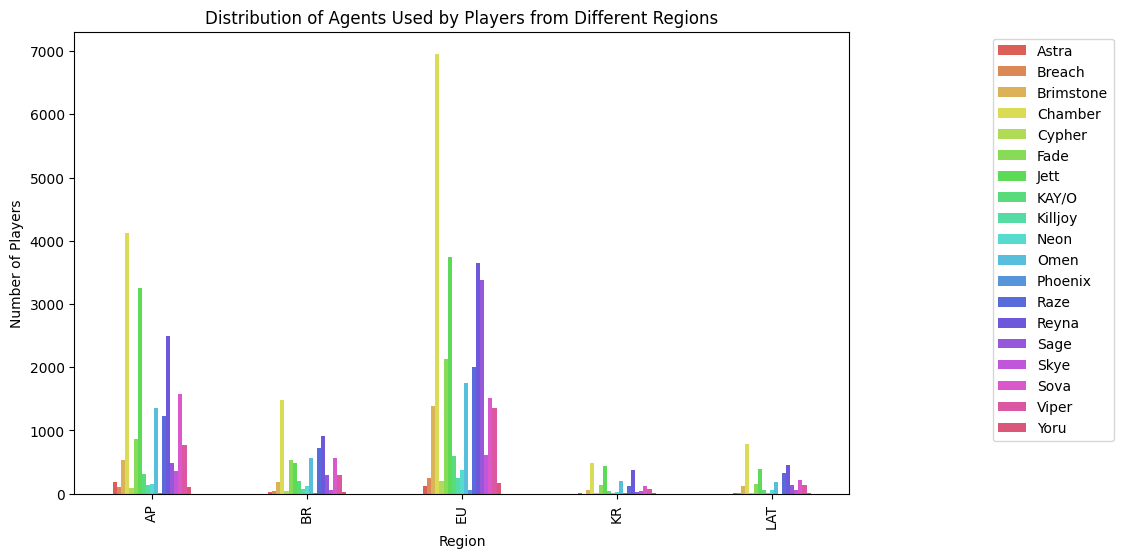

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by region and agent_1, and count the number of occurrences
grouped_df = df.groupby(['Region', 'Most Used Agent']).size().reset_index(name='counts')

# Define a custom color palette with 19 colors
agent_colors = sns.color_palette('hls', n_colors=19)

# Create a dictionary to map each agent to a unique color from the color palette
agent_color_map = {agent: color for agent, color in zip(grouped_df['Most Used Agent'].unique(), agent_colors)}

# Create a bar chart using the grouped data and the custom color map
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df.pivot(index='Region', columns='Most Used Agent', values='counts').plot.bar(ax=ax, color=grouped_df['Most Used Agent'].map(agent_color_map))
ax.set_xlabel('Region')
ax.set_ylabel('Number of Players')
ax.set_title('Distribution of Agents Used by Players from Different Regions')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
plt.show()

# Graph to answer this question Do players from different regions use different characters compared to other regions, or do all regions use the same characters?

Based on my analysis, I observed that Chamber is the most frequently played agent across all regions, followed by Viper, which is the second most popular. On the other hand, Phoenix and Cypher are the least favored agents.

Furthermore, the European region has the highest number of players, and among all the regions, only BR has more players who choose to play as Fade instead of Jett.

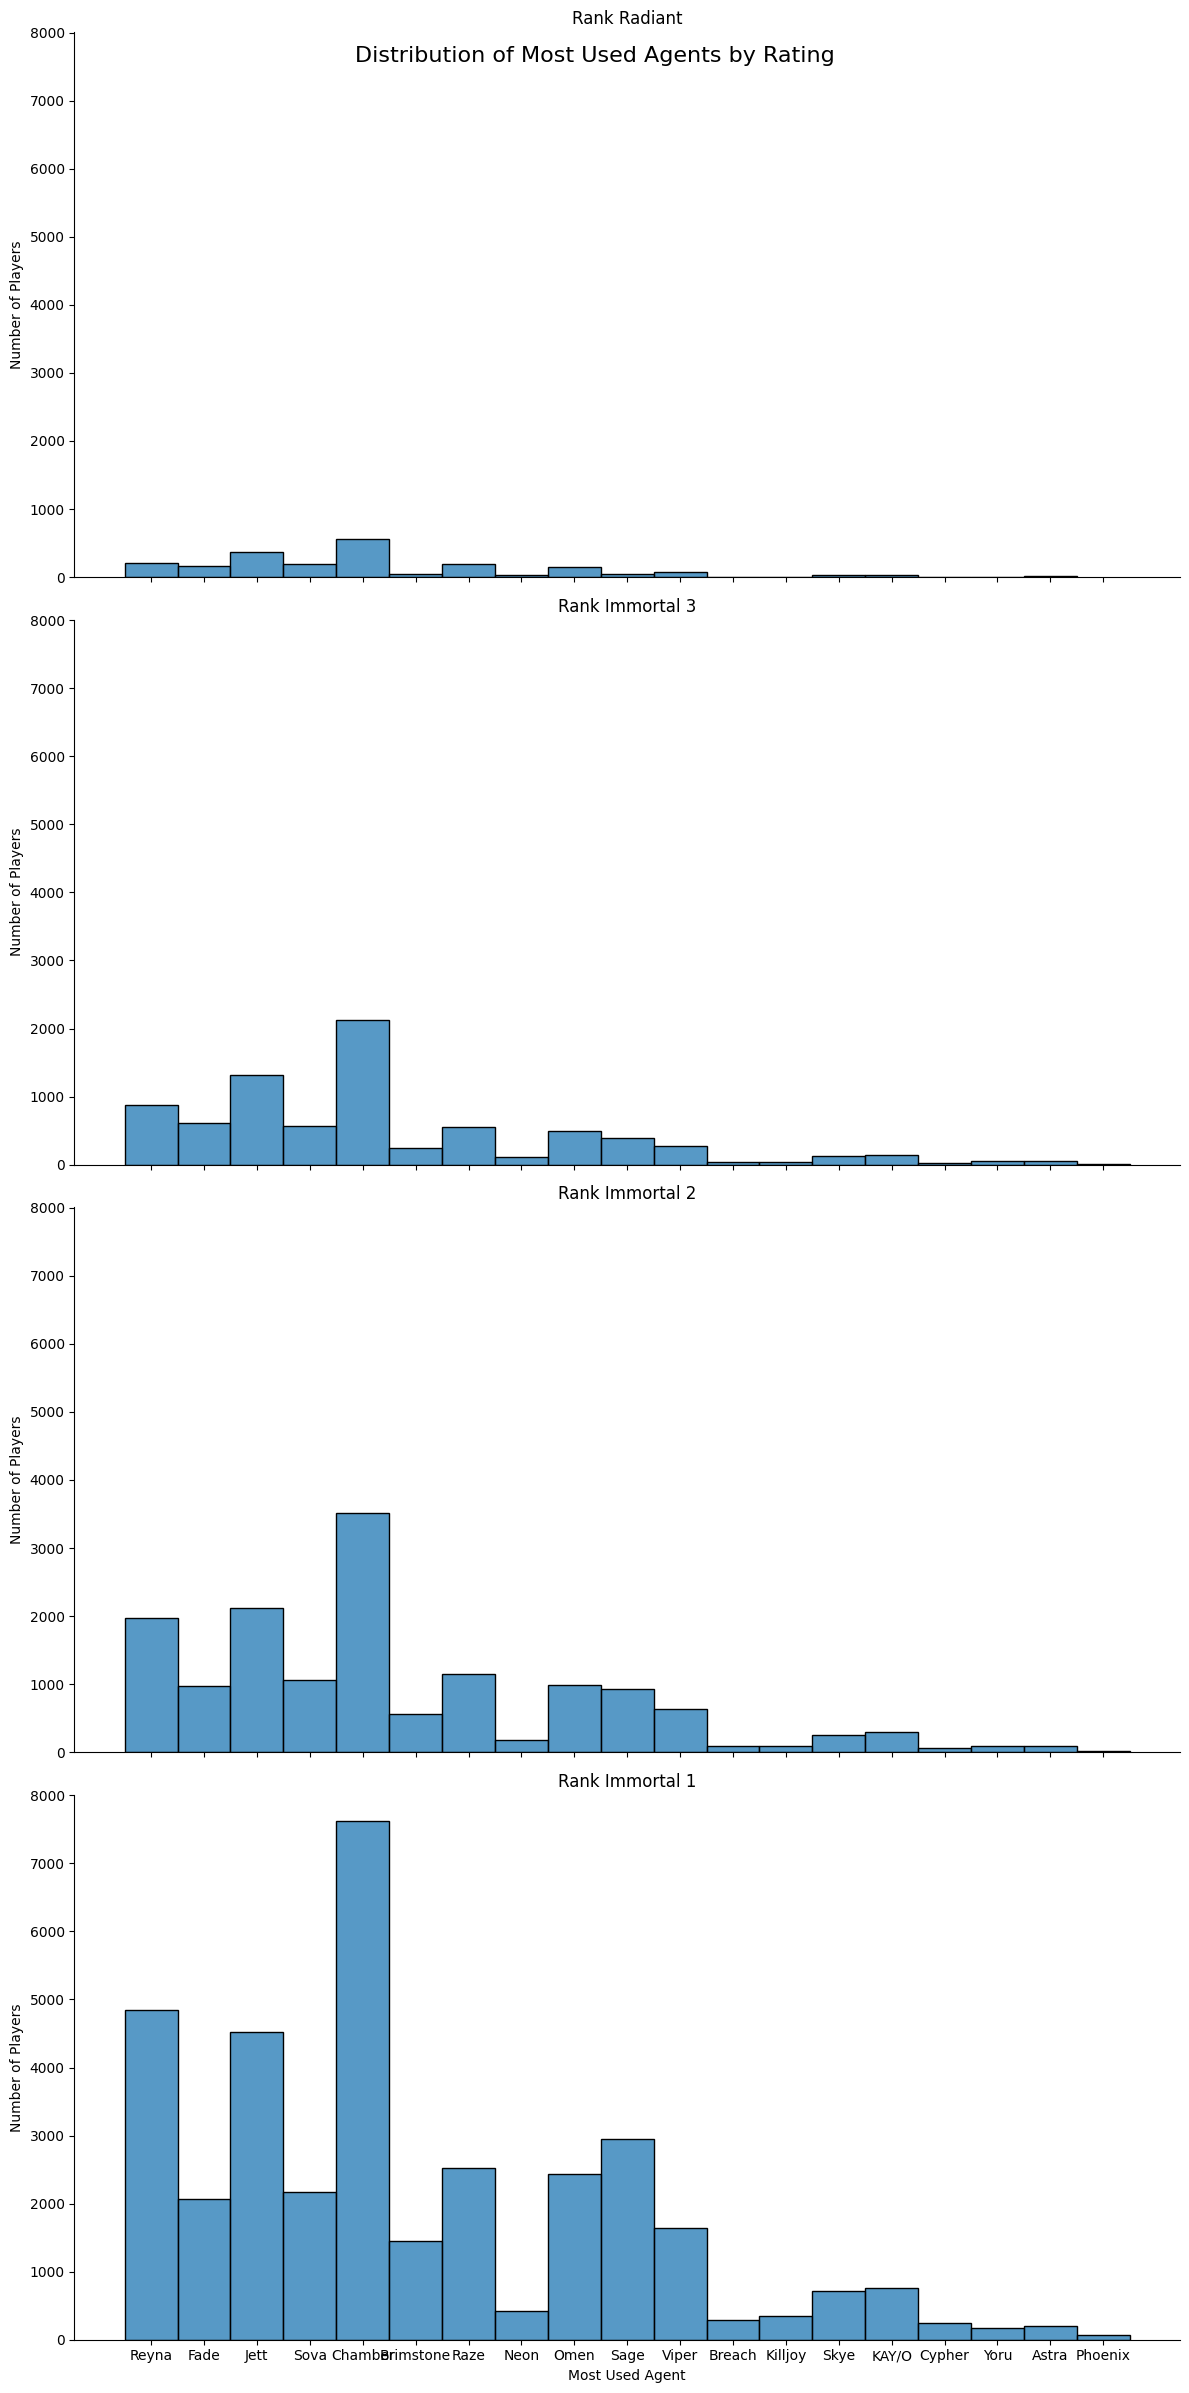

In [17]:
# Drop rows with missing values in the 'agent_1' column
df = df.dropna(subset=['Most Used Agent'])

# Create a FacetGrid to plot a histogram for each rating
g = sns.FacetGrid(data=df, col='Rank', col_wrap=1, height=6, aspect=2)

# Map a histogram of Agent_1 for each Rating
g.map(sns.histplot, 'Most Used Agent', bins=20)

# Set the title for each subplot
for ax, title in zip(g.axes.flat, df['Rank'].unique()):
    ax.set_ylabel('Number of Players')
    ax.set_title(f"Rank {title}")
"Rank {title}"'Most Used Agent'
# Set the x-axis label
g.set(xlabel='Most Used Agent')

# Add a main title for the plot
g.fig.suptitle('Distribution of Most Used Agents by Rating', fontsize=16)

# Show the plot
plt.show()

In terms of agent popularity, Chamber is the most commonly selected agent by rank.

Yoru, Cypher, and Phoenix, on the other hand, are the least picked agents across all ranks.

Upon analysis, it appears that each rank has a very similar agent meta with not much differentiation in the agents selected.

Looking back on my research question and data analysis, I realize that I could have chosen a more complex and challenging question from the outset. Additionally, I recognize that I could have put more effort into data cleaning to improve the quality of my results. Despite these shortcomings, I am satisfied with the overall outcome of my analysis, and I feel that I have learned a great deal from this experience. Going forward, I am confident that I can apply the knowledge and skills I have gained to complete similar analyses more efficiently and effectively.